In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

In [2]:
def apply_delay(xn, t):
    return np.pad(xn, (t, 0), 'constant') 

def fractional_delay(y, samples):
    ref = np.max(np.abs(y))
    
    f, i = math.modf(samples)
    
    # apply integer delay
    y = apply_delay(y, int(i))
    
    # linear interpolation for fractional part
    y = np.convolve(y, [f, i-f], "same")
    
    # normalize back go original max value
    y = y * ref / np.max(np.abs(y))
    return y

In [3]:
n = 512 + 1
fc = 0.75
center = round((n-1)/2)
t = np.linspace(-center, center, n)
y = fc * np.sinc(t * fc) * signal.windows.hamming(n)
# y = signal.firwin(n, cutoff = fc, window = "hamming")

In [4]:
y_ = apply_delay(y, 1)
y_fd1 = fractional_delay(y, 1.101)
y_fd2 = fractional_delay(y, 1.201)
y_fd3 = fractional_delay(y, 1.301)
y_fd4 = fractional_delay(y, 1.401)
y_fd5 = fractional_delay(y, 1.501)
y_fd6 = fractional_delay(y, 1.601)
y_fd7 = fractional_delay(y, 1.701)
y_fd8 = fractional_delay(y, 1.801)
y_fd9 = fractional_delay(y, 1.901)

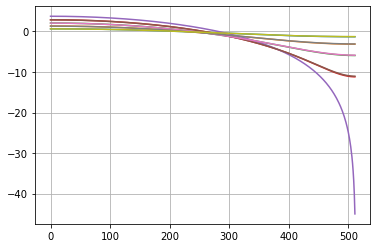

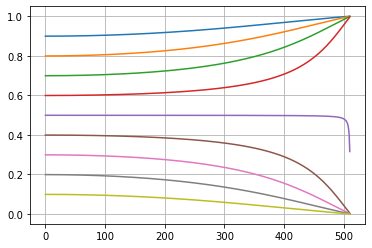

In [5]:
assert(len(y_) == len(y_fd1))
# this is the approach to calculate the frequency response of fractional delay intepolation
w0, h0 = signal.freqz(y_)
w1, h1 = signal.freqz(y_fd1, y_)
w2, h2 = signal.freqz(y_fd2, y_)
w3, h3 = signal.freqz(y_fd3, y_)
w4, h4 = signal.freqz(y_fd4, y_)
w5, h5 = signal.freqz(y_fd5, y_)
w6, h6 = signal.freqz(y_fd6, y_)
w7, h7 = signal.freqz(y_fd7, y_)
w8, h8 = signal.freqz(y_fd8, y_)
w9, h9 = signal.freqz(y_fd9, y_)

# amplitude0 = 20 * np.log10(abs(h0))
amplitude1 = 20 * np.log10(abs(h1))
amplitude2 = 20 * np.log10(abs(h2))
amplitude3 = 20 * np.log10(abs(h3))
amplitude4 = 20 * np.log10(abs(h4))
amplitude5 = 20 * np.log10(abs(h5))
amplitude6 = 20 * np.log10(abs(h6))
amplitude7 = 20 * np.log10(abs(h7))
amplitude8 = 20 * np.log10(abs(h8))
amplitude9 = 20 * np.log10(abs(h9))

# angle0 = np.unwrap(np.angle(h0))
angle1 = -np.unwrap(np.angle(h1[1:]))/w1[1:]
angle2 = -np.unwrap(np.angle(h2[1:]))/w2[1:]
angle3 = -np.unwrap(np.angle(h3[1:]))/w3[1:]
angle4 = -np.unwrap(np.angle(h4[1:]))/w4[1:]
angle5 = -np.unwrap(np.angle(h5[1:]))/w5[1:]
angle6 = -np.unwrap(np.angle(h6[1:]))/w6[1:]
angle7 = -np.unwrap(np.angle(h7[1:]))/w7[1:]
angle8 = -np.unwrap(np.angle(h8[1:]))/w8[1:]
angle9 = -np.unwrap(np.angle(h9[1:]))/w9[1:]

# plt.plot(amplitude0)
plt.plot(amplitude1)
plt.plot(amplitude2)
plt.plot(amplitude3)
plt.plot(amplitude4)
plt.plot(amplitude5)
plt.plot(amplitude6)
plt.plot(amplitude7)
plt.plot(amplitude8)
plt.plot(amplitude9)
plt.grid()
plt.show()

# plt.plot(angle0)
plt.plot(angle1)
plt.plot(angle2)
plt.plot(angle3)
plt.plot(angle4)
plt.plot(angle5)
plt.plot(angle6)
plt.plot(angle7)
plt.plot(angle8)
plt.plot(angle9)
plt.grid()
plt.show()